In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.arraysetops import setxor1d
from scipy.integrate import odeint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
###LOADING DATASET###
df = pd.read_csv('/content/drive/MyDrive/UCI Conference/Public_OC_COVID_Cases_by_City_by_Day.csv')

#https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/046cdd2b-31e5-4d34-9ed3-b48cdbc4be7a/download/covid19cases_test.csv
#https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/e2c6a86b-d269-4ce1-b484-570353265183/download/covid19casesdemographics.csv


FileNotFoundError: ignored

In [ ]:
###PROCESSING THE DATASET###
df_new = df.rename({'Total': 'dI'}, axis=1, inplace=False)

#creating the I(t) and dI/dt column
#assuming 0 cases in June 12, 2020
'''
dI_list = list(df_new['dI'])
I_list = [0 for i in range(len(dI_list))]
I_list[0] = dI_list[0]

for k in range(1, len(dI_list)):
  I_list[k] = dI_list[k] + I_list[k - 1]

I = pd.DataFrame(I_list, columns=['I'])
df_new = pd.concat([df_new, I], axis=1)
'''
#population of OC according to the US Census Bureau as of April 1, 2020
N = 3186989

df_new['di'] = df_new['dI']/N
#df_new['i'] = df_new['I']/N
df_new

,DateSpecCollect,Aliso_Viejo,Anaheim,Brea,Buena_Park,Costa_Mesa,Coto_de_Caza,Cypress,Dana_Point,Fountain_Valley,Fullerton,Garden_Grove,Huntington_Beach,Irvine,La_Habra,La_Palma,Ladera_Ranch,Laguna_Beach,Laguna_Hills,Laguna_Niguel,Laguna_Woods,Lake_Forest,Los_Alamitos,Midway_City,Mission_Viejo,Newport_Beach,Orange,Other,Placentia,Rancho_Mission_Viejo,Rancho_Santa_Margarita,Rossmoor,San_Clemente,San_Juan_Capistrano,Santa_Ana,Seal_Beach,Silverado,Stanton,Trabuco_Canyon,Tustin,Unknown,Villa_Park,Westminster,Yorba_Linda,dI,ObjectId,di
0,13-Jun-20,2,47,0,11,5,0,1,1,2,14,11,5,7,4,2,1,1,0,3,0,2,0,0,5,1,17,0,4,0,0,0,0,0,47,3,0,8,1,7,3,1,5,3,224,1,0.000070
1,14-Jun-20,2,31,2,4,4,0,3,0,1,7,11,3,4,1,0,1,1,0,3,0,1,0,3,6,1,5,0,3,0,0,0,0,0,27,5,0,4,0,4,7,0,3,1,148,2,0.000046
2,15-Jun-20,6,69,5,16,13,0,1,0,4,17,19,5,11,8,0,1,1,2,3,0,6,2,4,3,10,17,1,4,1,0,0,4,2,76,5,0,1,3,8,20,0,6,7,361,3,0.000113
3,16-Jun-20,3,85,2,20,25,0,2,3,2,26,35,22,11,13,3,3,0,3,4,0,4,0,1,5,7,24,0,10,1,6,1,2,3,120,6,0,10,0,10,44,2,7,4,529,4,0.000166
4,17-Jun-20,8,100,4,14,20,3,4,0,1,20,31,20,21,12,1,2,1,4,5,0,5,2,0,7,22,34,2,10,0,4,0,5,2,121,21,0,6,3,18,32,0,13,2,580,5,0.000182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,22-Nov-21,5,35,4,6,9,0,5,4,9,12,26,23,10,5,0,0,2,2,2,0,4,3,1,6,4,6,0,6,0,0,0,7,5,13,4,0,2,0,10,2,0,8,13,253,682,0.000079
682,23-Nov-21,3,31,3,6,12,0,3,1,4,7,16,13,16,2,1,0,1,1,3,0,11,3,0,11,5,9,1,4,0,3,1,5,6,23,2,0,3,6,8,2,0,13,3,242,683,0.000076
683,24-Nov-21,4,31,4,3,13,1,8,2,6,16,13,15,11,5,2,0,0,1,3,1,2,1,0,4,4,20,1,5,0,4,1,3,3,17,2,0,0,3,8,2,0,7,5,231,684,0.000072
684,25-Nov-21,2,14,1,4,3,0,2,2,0,9,6,5,1,3,0,0,0,0,1,0,2,0,0,3,2,4,0,3,0,0,0,1,1,10,1,0,2,1,0,4,0,2,1,90,685,0.000028


In [ ]:
def cumulative_list(original):
  final = [0 for i in range(len(original))]
  final[0] = original[0]
  for k in range(1, len(original)):
    final[k] = original[k] + final[k - 1]
  return final

def derivative_list(original):
  final = [0 for i in range(len(original))]
  final[0] = original[0]
  for k in range(1, len(original)):
    final[k] = original[k] - original[k - 1]
  return final

a = [3,6,7,10,13,18,29,33,40]
print("Expected:", list(df_new['dI']))
print("Actual:", derivative_list(I_list))

In [ ]:
R_list = [0 for i in range(df.shape[0])]
#inputting data from OC
R_list[0] = 4758; R_list[1] = 4806; R_list[2] = 5004; R_list[3] = 5143;
R_list[4] = 5323; R_list[5] = 5476; R_list[6] = 5635; R_list[7] = 5725;
R_list[8] = 5799; R_list[9] = 5867; R_list[10] = 6112; R_list[11] = 6301;
R_list[12] = 6514; R_list[13] = 6663; R_list[14] = 6794; R_list[15] = 6896;
R_list[16] = 7086; R_list[17] = 7287; R_list[18] = 7506; R_list[19] = 7715;
R_list[20] = 7918;
R = pd.DataFrame(R_list, columns=['R'])
df_test = pd.concat([df_new, R], axis=1)
df_test['r'] = df_test['R']/N

I_list = [0 for i in range(df.shape[0])]
I_list[0] = 10111; I_list[1] = 10259; I_list[2] = 10620; I_list[3] = 11149;
I_list[4] = 11729; I_list[5] = 12378; I_list[6] = 13083; I_list[7] = 13553;
I_list[8] = 13832; I_list[9] = 14712; I_list[10] = 15740; I_list[11] = 16801;
I_list[12] = 17812; I_list[13] = 18805; I_list[14] = 19429; I_list[15] = 19881;
I_list[16] = 20926; I_list[17] = 21980; I_list[18] = 22961; I_list[19] = 23893;
I_list[20] = 24656;
I = pd.DataFrame(I_list, columns=['I'])
df_test = pd.concat([df_test, I], axis=1)
df_test['i'] = df_test['I']/N
df_test

In [ ]:
y0 = list(df_new['i'])
x = [i for i in range(len(y0))]
plt.plot(x, y0)
plt.show()

y1 = list(df_new['di'])
plt.plot(x, y1)
plt.show()

In [ ]:
temp=3186989
N = 8000000

In [ ]:
#Define Variables

def euler_model(a_param, k_param, days_param, dt_param, N_param = N):
  #Define Variables

  #Length of the simulation
  days = days_param
  #Time step
  dt = dt_param
  #steps -- the number of points
  steps = int(days/dt)

  #Constants
  N = N_param
  a = a_param
  k = k_param

  #Initialize
  S = np.zeros(steps)
  I = np.zeros(steps)
  R = np.zeros(steps)
  t = np.arange(steps)*dt

  I[0] = 1/N
  S[0] = 1. - I[0]
  R[0] = 0.

  for i in range(steps-1):
    S[i+1] = S[i] - a*S[i]*I[i]*dt
    I[i+1] = I[i] + (a*S[i]*I[i] - k*I[i])*dt
    R[i+1] = R[i] + k*I[i]*dt

  #Plot
  fig = plt.figure(1); fig.clf()
  plt.plot(t, S, 'g', lw=3, label='Suseptible')
  plt.plot(t, I, 'r', lw=3, label='Infective')
  plt.plot(t, R, 'b', lw=3, label='Removed')

  fig.legend()
  plt.xlabel('Time (days)')
  plt.ylabel('Population')

NameError: ignored

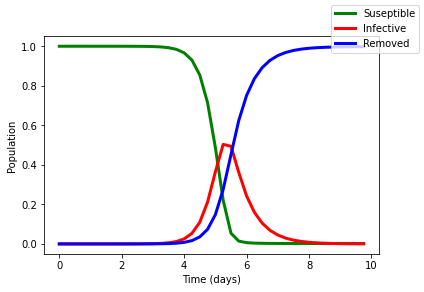

In [ ]:
euler_model(6, 1.4, 10, 0.25)

In [ ]:
S = None
I = None
R = None
def odes(x, t):
  #constants
  a = 6
  k = 1.4

  #assign each ODE to a vector element
  S = x[0]
  I = x[1]
  R = x[2]

  #define each ODE
  dSdt = -a*S*I
  dIdt = a*S*I - k*I
  dRdt = k*I

  return [dSdt, dIdt, dRdt]

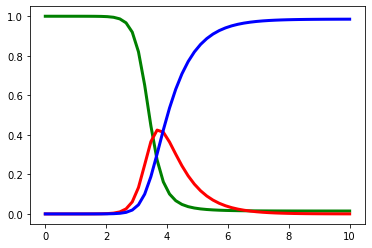

In [ ]:
#initial conditions
N = 8000000
I0 = 1/N
S0 = 1. - I0
R0 = 0.
x0 = [S0, I0, R0]

#declare a time vector (time window)
t = np.linspace(0, 10)
x = odeint(odes,x0,t)

S = x[:,0]
I = x[:,1]
R = x[:,2]

plt.plot(t, S, 'g', lw=3, label='Suseptible')
plt.plot(t, I, 'r', lw=3, label='Infective')
plt.plot(t, R, 'b', lw=3, label='Removed')
plt.show()

In [ ]:
max(I)

0.4241113750962976

In [ ]:
for i in range(10):
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
test = [5,3,2,7,8,1,9,6]

def moving_average(period, data):
  size = len(data)
  n_groups = (size - period) + 1
  retList = [0] * n_groups
  start = 0
  sum = 0

  for i in range(n_groups):
    for j in range(period):
      sum += data[start + j]
    retList[i] = sum/period
    sum = 0
    start += 1

  lagList = [0] * (period - 1)
  retList = lagList + retList

  return retList

In [ ]:
print(moving_average(3, test))

[0, 0, 3.3333333333333335, 4.0, 5.666666666666667, 5.333333333333333, 6.0, 5.333333333333333]


In [ ]:
df_new['dI']

0      224
1      148
2      361
3      529
4      580
      ... 
681    253
682    242
683    231
684     90
685    248
Name: dI, Length: 686, dtype: int64

In [ ]:
test = list(df_new['dI'])
print(moving_average(7, test))

[0, 0, 0, 0, 0, 0, 456.57142857142856, 491.7142857142857, 510.42857142857144, 584.5714285714286, 655.8571428571429, 724.5714285714286, 776.1428571428571, 817.2857142857143, 839.1428571428571, 863.8571428571429, 887.4285714285714, 891.1428571428571, 879.7142857142857, 868.4285714285714, 835.5714285714286, 798.2857142857143, 793.7142857142857, 793.4285714285714, 794.2857142857143, 802.0, 809.8571428571429, 840.4285714285714, 870.2857142857143, 862.8571428571429, 841.7142857142857, 814.5714285714286, 791.0, 767.7142857142857, 739.5714285714286, 716.7142857142857, 708.2857142857143, 659.5714285714286, 618.7142857142857, 572.4285714285714, 526.7142857142857, 486.14285714285717, 469.57142857142856, 458.14285714285717, 450.2857142857143, 434.14285714285717, 427.7142857142857, 420.85714285714283, 416.42857142857144, 412.57142857142856, 380.0, 309.14285714285717, 242.0, 172.42857142857142, 107.57142857142857, 41.42857142857143, 3.857142857142857, 5.285714285714286, 8.571428571428571, 10.1428571